In [1]:
import pandas as pd
import datetime
import pprint
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%run HelpClasses.ipynb

In [2]:
columns = ["time","priority","class","message","extra"]
# date = "2021-03-26"
date = "2021-04-17"
filename_app = date+".log"
filename_hci = "hci-"+date+".csv"
device_macs = [mac.lower() for mac in ["24:0A:C4:61:78:D2","24:0A:C4:60:EF:3A","24:0A:C4:60:E5:D2"]]

In [3]:
df = pd.read_csv(filename_hci)
df["Time.1"] = pd.to_datetime(df["Time.1"],format="%Y-%m-%d %H:%M:%S,%f")+ pd.Timedelta(hours=1)
df

,No.,Time,Source,Destination,Protocol,Length,Time.1,Direction,Handle,Value,Opcode,RSSI,BD_ADDR,Command Opcode,Connection Interval Min,Connection Interval Max,Connection Latency,Supervision Timeout
0,1,0.000000,host,controller,HCI_CMD,4,2021-04-17 20:25:18.593226,Sent,NaN,NaN,NaN,NaN,NaN,Reset,NaN,NaN,NaN,NaN
1,2,0.003294,controller,host,HCI_EVT,7,2021-04-17 20:25:18.596520,Rcvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.003688,host,controller,HCI_CMD,4,2021-04-17 20:25:18.596914,Sent,NaN,NaN,NaN,NaN,NaN,Read Buffer Size,NaN,NaN,NaN,NaN
3,4,0.005670,controller,host,HCI_EVT,14,2021-04-17 20:25:18.598896,Rcvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.006062,host,controller,HCI_CMD,11,2021-04-17 20:25:18.599288,Sent,NaN,NaN,NaN,NaN,NaN,Host Buffer Size,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,39.367354,controller,host,HCI_EVT,7,2021-04-17 20:25:57.960580,Rcvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,547,39.367546,host,controller,HCI_CMD,5,2021-04-17 20:25:57.960772,Sent,NaN,NaN,NaN,NaN,NaN,Write Scan Enable,NaN,NaN,NaN,NaN
547,548,39.368526,controller,host,HCI_EVT,7,2021-04-17 20:25:57.961752,Rcvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,549,39.368717,host,controller,HCI_CMD,4,2021-04-17 20:25:57.961943,Sent,NaN,NaN,NaN,NaN,NaN,LE Clear White List,NaN,NaN,NaN,NaN


In [4]:
print('sources:%s'%list(set(df['Source'].values)))

sources:['HuaweiTe_27:59:79 (HUAWEI P20 Pro)', 'Espressi_60:ef:3a (ESP32-T)', 'controller', 'host']


In [5]:
frames = dict()
for addr in device_macs:
    addr_short = addr[-8:]
    frames[addr] = df[(df['Destination'].str.contains(addr_short))|(df['Source'].str.contains(addr_short))]
    print(addr,':',len(frames[addr]),'entries')

24:0a:c4:61:78:d2 : 0 entries
24:0a:c4:60:ef:3a : 104 entries
24:0a:c4:60:e5:d2 : 0 entries


In [6]:
frames[device_macs[1]].head(50)

,No.,Time,Source,Destination,Protocol,Length,Time.1,Direction,Handle,Value,Opcode,RSSI,BD_ADDR,Command Opcode,Connection Interval Min,Connection Interval Max,Connection Latency,Supervision Timeout
360,361,9.076994,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,2021-04-17 20:25:27.670220,Sent,NaN,NaN,Read By Group Type Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,367,9.219052,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,23,2021-04-17 20:25:27.812278,Rcvd,"0x0001,0x0014",NaN,Read By Group Type Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,368,9.219567,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,2021-04-17 20:25:27.812793,Sent,NaN,NaN,Read By Group Type Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,370,9.364680,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,31,2021-04-17 20:25:27.957906,Rcvd,0x0028,NaN,Read By Group Type Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,371,9.365171,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,2021-04-17 20:25:27.958397,Sent,NaN,NaN,Read By Type Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,372,9.510273,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,14,2021-04-17 20:25:28.103499,Rcvd,0x0001,NaN,Error Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,373,9.511042,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,2021-04-17 20:25:28.104268,Sent,NaN,NaN,Read By Type Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,375,9.607835,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,18,2021-04-17 20:25:28.201061,Rcvd,"0x0003,0x0002",NaN,Read By Type Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,376,9.608704,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,16,2021-04-17 20:25:28.201930,Sent,NaN,NaN,Read By Type Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,378,9.671922,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,14,2021-04-17 20:25:28.265148,Rcvd,0x0003,NaN,Error Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def get_connection_establishing(df):
    possible_rows = df[~df['Command Opcode'].isna()]
    starting_indices = possible_rows[possible_rows['Command Opcode'].str.contains('LE Add Device To White List')].index
    connection_update_indices = possible_rows[possible_rows['Command Opcode'].str.contains('LE Connection Update')].index
    connection_start_intervals = [(start,[i for i in connection_update_indices if i>start][0]) for start in starting_indices]
    return connection_start_intervals

def get_connection_updates(df):
    possible_rows = df[~df['Command Opcode'].isna()]
    connection_update_indices = possible_rows[possible_rows['Command Opcode'].str.contains('LE Connection Update')].index
    return connection_update_indices.values

In [8]:
print(get_connection_establishing(df))
print(get_connection_updates(df))

[(348, 359)]
[359 423 432]


In [9]:
def get_advertising_trace(df):
    return df[(df['Protocol'] == 'HCI_EVT') & (~df['RSSI'].isna())]
    

In [10]:
get_advertising_trace(df)

,No.,Time,Source,Destination,Protocol,Length,Time.1,Direction,Handle,Value,Opcode,RSSI,BD_ADDR,Command Opcode,Connection Interval Min,Connection Interval Max,Connection Latency,Supervision Timeout
270,271,4.477249,controller,host,HCI_EVT,42,2021-04-17 20:25:23.070475,Rcvd,NaN,NaN,NaN,-50 dBm,24:0a:c4:60:ef:3a,NaN,NaN,NaN,NaN,NaN
271,272,4.478396,controller,host,HCI_EVT,45,2021-04-17 20:25:23.071622,Rcvd,NaN,NaN,NaN,-48 dBm,24:0a:c4:60:ef:3a,NaN,NaN,NaN,NaN,NaN


In [11]:
%run HelpClasses.ipynb

550
0 142058 1 6.0 14
1 145113 1 6.0 22
2 145102 1 6.0 0
3 96793 1 6.0 0
4 63218 1 6.0 0
5 13823 1 6.0 0
6 14056 1 6.0 0
7 21793 1 6.0 0
8 14815 1 6.0 0
9 13657 1 6.0 0
10 14079 1 6.0 0
11 13356 1 6.0 0
12 14953 1 6.0 0
13 14817 1 6.0 0
14 14059 1 6.0 0
15 22822 1 6.0 0
16 13720 1 6.0 0
17 14839 1 6.0 0
18 13698 1 6.0 0
19 14144 1 6.0 0
20 13813 1 6.0 0
21 13466 1 6.0 0
22 14425 1 6.0 0
23 95109 1 39.0 0
24 248080 3 36.0 48
25 301153 3 36.0 48
26 300782 3 36.0 48
27 338033 3 36.0 48
28 320618 3 36.0 48
29 357081 3 36.0 48
30 237390 3 36.0 48
31 321226 3 36.0 48
32 267707 3 36.0 48


,No.,Time,Timediff,Source,Destination,Protocol,Length,Time.1,Direction,Handle,Value,Opcode,RSSI,BD_ADDR,Command Opcode,Connection Interval Min,Connection Interval Max,Connection Latency,Supervision Timeout
445,446,24.760270,0 days 00:00:00,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,12,2021-04-17 20:25:43.353496,Sent,0x002a,NaN,Read Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,447,24.882569,0 days 00:00:00.122299,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,32,2021-04-17 20:25:43.475795,Rcvd,0x002a,34354c6f72656d20697073756d20646f6c6f72207369,Read Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,448,24.883060,0 days 00:00:00.122790,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,14,2021-04-17 20:25:43.476286,Sent,0x002a,NaN,Read Blob Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,450,24.972170,0 days 00:00:00.211900,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,32,2021-04-17 20:25:43.565396,Rcvd,0x002a,7420616d65742c20636f6e7365637465747565722061,Read Blob Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,451,24.972673,0 days 00:00:00.212403,HuaweiTe_27:59:79 (HUAWEI P20 Pro),Espressi_60:ef:3a (ESP32-T),ATT,14,2021-04-17 20:25:43.565899,Sent,0x002a,NaN,Read Blob Request,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,452,25.061423,0 days 00:00:00.301153,Espressi_60:ef:3a (ESP32-T),HuaweiTe_27:59:79 (HUAWEI P20 Pro),ATT,11,2021-04-17 20:25:43.654649,Rcvd,0x002a,64,Read Blob Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN


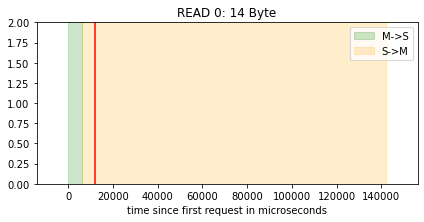

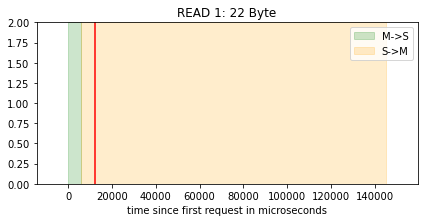

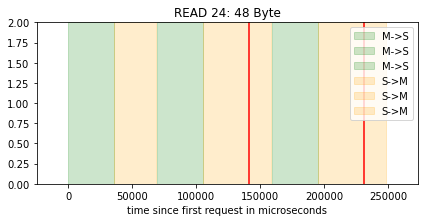

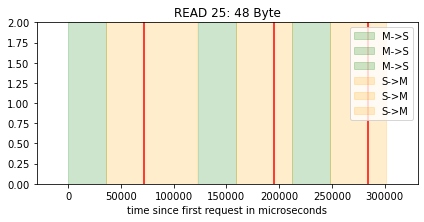

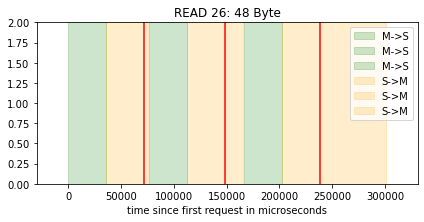

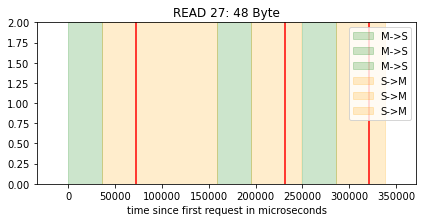

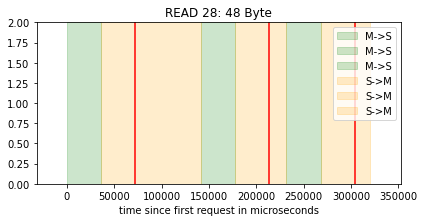

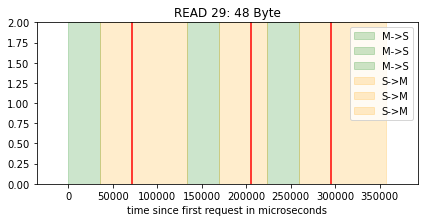

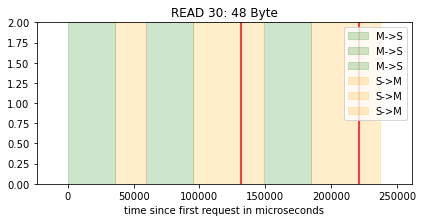

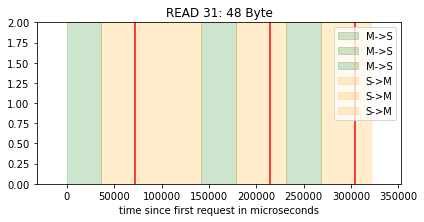

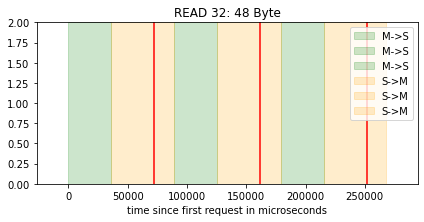

In [20]:
latest_request_end = 0
requests = []
print(len(df))
for i in range(0,100):
    if(latest_request_end < len(df)):
        new_request = Request(df.loc[latest_request_end:])
        if new_request.end_request_index >= 0:
            latest_request_end = new_request.end_request_index+1
            requests.append(new_request)
        else:
            latest_request_end += 1
conn_updates = get_connection_updates(df)
conn_update_info = [(i, df.loc[i]['Connection Interval Max']) for i in conn_updates]
    
for i,r in enumerate(requests):
    latest_conn_interval = [b for a,b in conn_update_info if not a > r.start_request_index][-1]
    r.set_conn_interval(latest_conn_interval)
    print(i,r.duration.microseconds,r.request_amount,latest_conn_interval,r.data)
    if r.request_type == 'READ':
        r.plot(title_extra = str(i) + ": " + str(r.data)+" Byte")
        
requests[25].dataframe

In [13]:
def get_request_trace_read(df):
    request_indices = list(df[(df['Direction'].str.contains('Sent')) & (df['Opcode'].str.contains('Read Request'))].index.values)
    response_indices = list(df[(df['Direction'].str.contains('Rcvd')) & (df['Opcode'].str.contains('Read Blob Response')) & (df['Length'] < 32)].index.values)
    request_times = [df.loc[index]['Time.1'] for index in request_indices]
    response_times = [df.loc[index]['Time.1'] for index in response_indices]
    return list(zip(request_indices,response_indices)),list(zip(request_times,response_times))

In [14]:
get_request_trace_read(frames[device_macs[1]])

([(437, 443),
  (445, 451),
  (453, 459),
  (461, 467),
  (469, 475),
  (477, 483),
  (485, 491),
  (493, 499),
  (501, 507)],
 [(Timestamp('2021-04-17 20:25:41.787342'),
   Timestamp('2021-04-17 20:25:42.035422')),
  (Timestamp('2021-04-17 20:25:43.353496'),
   Timestamp('2021-04-17 20:25:43.654649')),
  (Timestamp('2021-04-17 20:25:44.569786'),
   Timestamp('2021-04-17 20:25:44.870568')),
  (Timestamp('2021-04-17 20:25:46.017183'),
   Timestamp('2021-04-17 20:25:46.355216')),
  (Timestamp('2021-04-17 20:25:47.609063'),
   Timestamp('2021-04-17 20:25:47.929681')),
  (Timestamp('2021-04-17 20:25:49.328037'),
   Timestamp('2021-04-17 20:25:49.685118')),
  (Timestamp('2021-04-17 20:25:51.112271'),
   Timestamp('2021-04-17 20:25:51.349661')),
  (Timestamp('2021-04-17 20:25:52.603955'),
   Timestamp('2021-04-17 20:25:52.925181')),
  (Timestamp('2021-04-17 20:25:54.052345'),
   Timestamp('2021-04-17 20:25:54.320052'))])

In [15]:
%run HelpClasses.ipynb

In [16]:
x = Request(df_tmp,conn_interval=42)
x.plot()

NameError: name 'df_tmp' is not defined

In [ ]:
device_infos = dict()
for device in device_macs:
    frame = frames[device]
    device_communication = dict()
    request_indices,request_times = get_request_trace_read(frame)
    device_communication['read requests'] = request_indices
    device_communication['read requests times'] = request_times
    device_infos[device] = device_communication
pprint.pprint(device_infos)
print()
for addr, info in device_infos.items():
    print(addr)
    times = info['read requests times']
    for a,b in times:
        print("\t",b-a)
    request_indices = info['read requests']
    for a,b in request_indices:
        request = Request(df.loc[a:b],conn_interval=54)
        request.plot()

In [ ]:
print(frames[device_macs[1]].columns)

In [ ]:
def print_read_request_packets(df,start_index,end_index,conn_interval=54,title="",max_intervals = None):
    read_df = df.loc[start_index:end_index].copy()
    
    time_begin = read_df.iloc[0]['Time.1']
    # print(connection_intervals)
    if max_intervals == None:
        latest_packet = read_df['Time.1'].apply(lambda x:x-time_begin).max().microseconds/1000
        max_intervals = np.ceil(latest_packet / conn_interval).astype(int)+1
    connection_intervals = [i for i in range(0,conn_interval*max_intervals,conn_interval)]
    
    fig, ax = plt.subplots(figsize=(6,3))
    # plt.plot(connection_intervals,[1.1]*len(connection_intervals),'*')
    plt.title(title)
    plt.ylim([0.5,2])
    plt.xlim([0,max(connection_intervals)])
    ax.axes.yaxis.set_visible(False)
    
    # conn - intervall lines
    plt.vlines(connection_intervals,0.5,2,linestyles='dotted')
    
    # data packets
    for index, row in read_df.iterrows():
        info = row['Opcode'].lower()
        packet_time = (row['Time.1']-time_begin).microseconds / 1000
        #duration might be not interesting at all
        packet_size_bit = (row['Length']-1)*8
        rect_width = conn_interval/4
        if 'request' in info:
            rect = matplotlib.patches.Rectangle((packet_time, 1), rect_width , 0.5, linewidth=1, alpha=0.2,color='orange')
            plt.text(packet_time,1,'REQ',color='orange')
            ax.add_patch(rect)
        elif 'response' in info:
            rect = matplotlib.patches.Rectangle((packet_time, 1), -rect_width, 0.5, linewidth=1, alpha=0.2,color='green')
            plt.text(packet_time-rect_width,1.5,'RES',color='green')
            ax.add_patch(rect)
    plt.tight_layout()
    plt.xlabel('time in ms')
    plt.show()


In [ ]:
for addr,info in device_infos.items():
    for read_request_start,read_request_end in info['read requests']:
        print_read_request_packets(frames[addr],read_request_start,read_request_end,title="%s %s-%s"%(addr,read_request_start,read_request_end),max_intervals=8)

In [ ]:
col = list(matplotlib.colors.BASE_COLORS.values())
fig, ax = plt.subplots(figsize=(12,3))
for index,addr in enumerate(device_macs):
    index+=1
    for request,response in device_infos[addr]['read requests']:
        date_request = frames[addr].loc[request]['Time.1']
        date_response = frames[addr].loc[response]['Time.1']
        plt.plot(date_request,1*index,'^',color=col[index-1])
        plt.plot(date_response,1*index,'x',color=col[index-1])
        
        # Create a Rectangle patch
        time_delta = date_response-date_request
        rect = matplotlib.patches.Rectangle((date_request, 1*index), time_delta, 0.5, linewidth=1, edgecolor='r', facecolor=col[index-1],alpha=0.1)
        text = "%s.%s"%(time_delta.seconds,time_delta.microseconds)
        plt.text(date_request,1*index+0.2,text)
        # Add the patch to the Axes
        ax.add_patch(rect)
        
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('zero')
plt.tight_layout()
plt.show()

In [ ]:
for addr in device_macs:
    for request_index in device_infos[addr]['read requests']:
        packets_between = frames[addr].loc[request_index[0]:request_index[1]]
        send = packets_between[packets_between['Direction'] == 'Sent']
        received = packets_between[packets_between['Direction'] == 'Rcvd']

        fig, ax = plt.subplots(figsize=(12,1))
        plt.plot(send['Time.1'],[2]*len(send['Time.1']),'^')
        alternate = 0
        for time,send_type in zip(send['Time.1'].values,send['Opcode'].values):
            if('Blob' in send_type):
                send_type = 'Blob'
            elif (send_type == 'Read Request'):
                send_type = 'Read'
            plt.text(time,1.75-alternate/5,send_type)
            alternate = (alternate+1)%2

        plt.plot(received['Time.1'],[3]*len(received['Time.1']),'x')
        alternate = 0
        for time,send_type in zip(received['Time.1'].values,received['Opcode'].values):
            if('Blob' in send_type):
                send_type = 'Blob'
            elif (send_type == 'Read Response'):
                send_type = 'Read'
            plt.text(time,3.25+alternate/5,send_type)
            alternate = (alternate+1)%2
        time_delta = received['Time.1'].max()-send['Time.1'].min()

        fig.suptitle("%s requests & %s responses in %s.%s seconds"%(len(send),len(received),time_delta.seconds,time_delta.microseconds))
        fig.subplots_adjust(top=1.5)
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        plt.show()